In [1]:
import pandas as pd

df = pd.read_excel("Nifty 50 Historical Data (1).xlsx")
df = df[['Date', 'Price']].copy()
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date').reset_index(drop=True)

## Log Return Construction

Daily log returns are computed from closing prices to obtain a
stationary series suitable for volatility modeling.

In [2]:
import numpy as np

df['log_return'] = np.log(df['Price'] / df['Price'].shift(1))
df = df.dropna().reset_index(drop=True)

df.head()


,Date,Price,log_return
0,2015-01-21,8729.5,0.003891
1,2015-01-22,8761.4,0.003648
2,2015-01-23,8835.6,0.008433
3,2015-01-27,8910.5,0.008441
4,2015-01-28,8914.3,0.000426


## Return Dynamics

The time series plot illustrates return behavior, including volatility
clustering and periods of elevated market uncertainty.

## Return Dynamics

The time series plot illustrates return behavior, including volatility
clustering and periods of elevated market uncertainty.


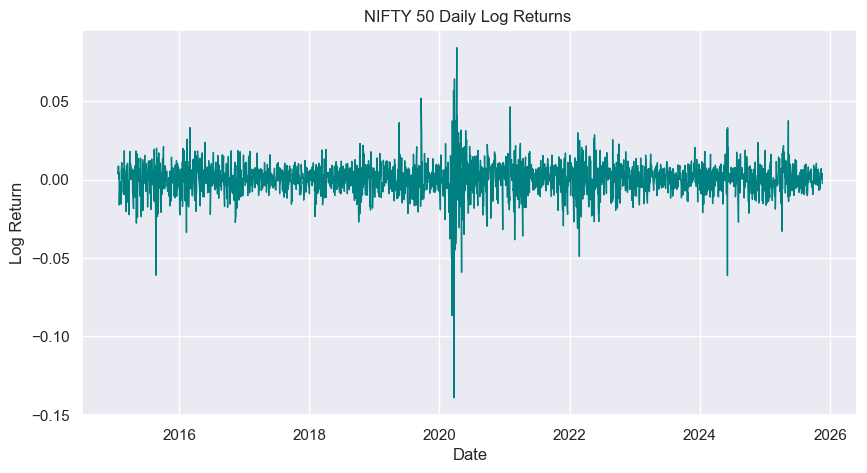

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="darkgrid")


plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Date', y='log_return', color='teal', linewidth=1)

plt.title('NIFTY 50 Daily Log Returns ')
plt.xlabel('Date')
plt.ylabel('Log Return')



plt.show()

## ARCH Effect Testing

An ARCH LM test is conducted to assess the presence of conditional
heteroskedasticity in returns.

In [4]:
from statsmodels.stats.diagnostic import het_arch

arch_test = het_arch(df['log_return'], nlags=5)

labels = ['LM Statistic', 'LM Test p-value', 'F Statistic', 'F Test p-value']
dict(zip(labels, arch_test))


{'LM Statistic': np.float64(454.6892289532515),
 'LM Test p-value': np.float64(4.783453112398815e-96),
 'F Statistic': 109.29838853834964,
 'F Test p-value': 2.7945864728855135e-105}